# ECH 60 Spring 2022: QUIZ 4

<font color='red'> Total 5.5+3+4=12.5 points</font>. 

Stop working on this quiz within 45 minutes of starting it. Rename this file as lastname_firstname and upload to canvas in the correct ipynb format within an hour of your section start time. Partial points will be awarded ONLY IF a reasonably accurate attempt has been made. 

You may consult your notes, lecture material, or tutorials. You must NOT consult any other sources. You should NOT seek help from anyone else for the duration of the quiz. And you should NOT share or discuss questions with other sections after your quiz. Any violation of these rules will be treated as academic misconduct, and  will be reported as such to the office of student support and judicial affairs.

Acknowledge abiding by these rules by writing a single line of code to print your name:
<font color='red'> [-0.5 point if incomplete] </font>

**PROBLEM 0:** First, run the following code cell to import modules and familiar functions we have developed in past tutorials.

In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
import scipy.optimize as so
import scipy.ndimage as sim

# func_deriv(function,point) returns derivative of a user-defined function at the provided point
def func_deriv(f,a):
    h=0.01
    f_front=f(a+h)
    f_back=f(a-h)    
    dfdx=(f_front-f_back)/(2*h)
    return dfdx

# data_deriv(ydata,xdata) returns derivative of an array y with respect to an array x 
# using second-order finite differences
def data_deriv(y,x):
    h=x[1]-x[0]
    dydx=np.zeros(y.shape)    
    dydx[0]=(-3*y[0]+4*y[1]-y[2])/(2*h)
    dydx[-1]=(3*y[-1]-4*y[-2]+y[-3])/(2*h)
    dydx[1:-1]=(y[2:]-y[:-2])/(2*h)
    
    return dydx

# func_deriv2(function,point) returns second derivative of a user-defined function at the provided point
def func_deriv2(f,a):
    h=0.01
    f_front=f(a+h)
    f_current=f(a)
    f_back=f(a-h)    
    d2fdx2=(f_front-2*f_current+f_back)/(h**2)    
    return d2fdx2

# data_deriv2(ydata,xdata) returns second derivative of an array y with respect to an array x 
# using second-order finite differences
def data_deriv2(y,x):
    h=x[1]-x[0]
    d2ydx2=np.zeros(y.shape) # initialize
    
    # first point
    d2ydx2[0]=(2*y[0]-5*y[1]+4*y[2]-y[3])/(h**2)
    #last point
    d2ydx2[-1]=(2*y[-1]-5*y[-2]+4*y[-3]-y[-4])/(h**2)
    # all other points, vectorized
    d2ydx2[1:-1]=(y[2:]-2*y[1:-1]+y[:-2])/(h**2)
    
    return d2ydx2

# linfit(xdata,ydata) returns a,b such that ydata=a+b*xdata
def linfit(x,y):
    n=len(x)
    sx=sum(x)
    sy=sum(y)
    sxx=sum(x**2)
    sxy=sum(x*y)

    a=(sx*sxy-sy*sxx)/(sx**2-n*sxx)
    b=(sx*sy-n*sxy)/(sx**2-n*sxx)
    return a,b

**PROBLEM 1:**  <font color='red'> [Total 5.5 points] </font>



**1 (a):** Create an array `t` containing 300 points between 0 to 10. Create another array `y` which contains the values 

$$ y(t) = \left[ \sin(t)+\frac{1}{2}\sin^2(2t) \right]e^{-t/5}$$

In [39]:
t=np.linspace(0,10,301)
y = np.array((np.sin(t)+(0.5*(np.sin(2*t)**2)))*np.exp(-t/5))

**1 (b):** Find the derivative of $y$ with respect to $t$ using second-order finite differences using the `data_deriv` function.


In [117]:
z=data_deriv2(y,t)

**1 (c):** Create a 1D filter array named `f50` to represent a moving average across 50 points. 



In [77]:
m=50
emp=np.ones(m)/m
f50=sim.convolve(y,emp)

**1 (d):** Generate a new array by convolving the the derivative of $y(t)$ with the above `f50` filter. 



In [93]:
new=np.array(f50*z)

**1 (e):** Plot the derivative using a solid line and the filtered derivative using a dashed line of a different color. Provide axis labels and a legend.



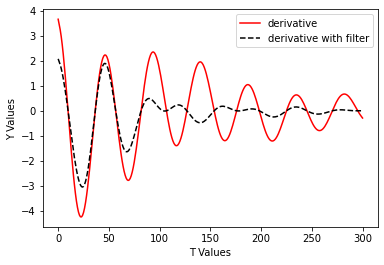

In [115]:
plt.plot(z,'r')
plt.plot(new,'k--')
plt.xlabel("T Values")
plt.ylabel("Y Values")
plt.legend(['derivative','derivative with filter'])
plt.show()

**1 (f):** Find the second derivative of $y^2(t)$ using the provided finite difference function. **only one line of code required**



In [119]:
second_of=data_deriv2(z,t)

**PROBLEM 2:**  <font color='red'> [Total 3 points] </font>



**2(a):** Import and display the image file `microtubules.jpg` provided with the quiz on canvas.


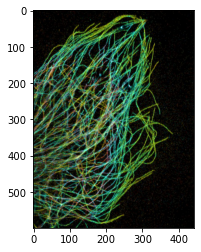

In [18]:
mirco=plt.imread('microtubules.jpg')
plt.imshow(mirco)
plt.show()

**2(b):** Create a 2D array containing only the green slice thresholded to >50% intensity (meaning green pixel value at 128 or higher). Display this array using a green colormap.


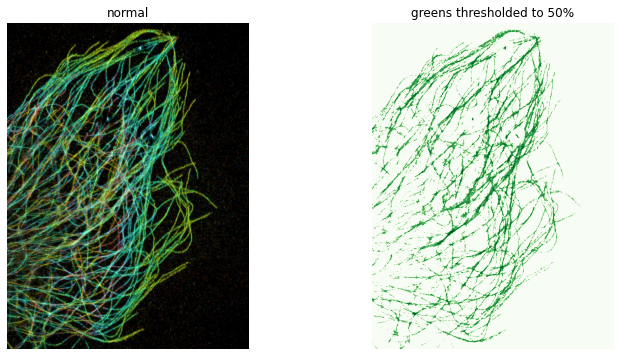

In [27]:
g=mirco[:,:,1]  

g1=(g>=128)*g 

plt.figure(figsize=(12,6))

plt.subplot(121)
plt.imshow(mirco)
plt.title('normal')
plt.axis('off')

plt.subplot(122)
plt.imshow(g1,cmap='Greens')
plt.title('greens thresholded to 50%')
plt.axis('off')

plt.show()

**PROBLEM 3:** <font color='red'> [Total 4 points] </font>

A simple model that relates applied stress, $\sigma$, to the fractional deformation (also known as strain), $\epsilon$, for biological tissue is

$$ \frac{d \sigma}{d \epsilon} = a+ b \sigma,  $$

where $a$ and $b$ are material constants. The following stresses and strains were recorded in an experiment. 

$$\begin{matrix} 
{\sigma~({\rm kN/m^2})} & 0 & 252 & 531 & 840 & 1184 & 1558 & 1975 & 2444 & 2943 & 3500 & 4114\\
{\epsilon}& 0 &  0.05 & 0.10 & 0.15 & 0.20 & 0.25 & 0.30 & 0.35 & 0.40 & 0.45 & 0.50 
\end{matrix}$$

Find $a$ and $b$ using a linear fit between appropriate variables. 



In [70]:
sig=np.array([0,252,531,840,1184,1558,1975,2444,2943,3500,4114])
eps=np.array([0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5])

data_deriv=(eps,sig)

a,b=linfit(sig,eps)
print("Constant a is : " + str(a))
print("Constant b is : " + str(b))

Constant a is : 0.03807764540581667
Constant b is : 0.00012052871622646282


*Rough work/test cells (won't be graded):*